Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "avdashko"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [24]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        res = 0
        
        for i in range(len(self.xk)):
            L = 1
            for j in range(len(self.xk)):
                if i!=j:
                    L = L * (x - self.xk[j])/(self.xk[i] - self.xk[j])
            res += L * (self.yk[i])
        return res
        

In [25]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


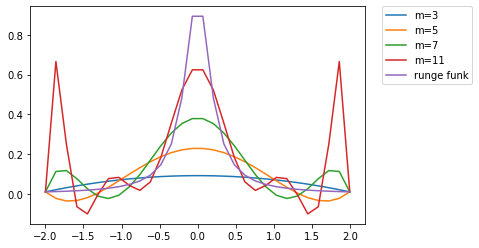

In [26]:
import matplotlib.pyplot as plt
fig = plt.subplots()
xx = np.linspace(-2, 2, 30)
for m in (3, 5, 7, 11):
    xk = np.linspace(-2, 2, m+1)
    yk = runge_func(xk)
    K = LagrangeInterpolator(xk, yk)
    plt.plot(xx, K(xx), label = f"m={m}")
plt.plot(xx, runge_func(xx), label = "runge funk")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

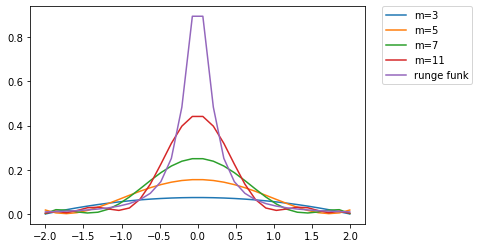

In [27]:
def cheb_nodes(n):
    k=np.arange(1,n)
    return (2* np.cos((2*k - 1)* np.pi/(2*n)))
fig = plt.subplots()
xx = np.linspace(-2, 2, 30)
for m in (3, 5, 7, 11):
    xk = cheb_nodes(m+1)
    yk = runge_func(xk)
    K = LagrangeInterpolator(xk, yk)
    plt.plot(xx, K(xx), label = f"m={m}")
plt.plot(xx, runge_func(xx), label = "runge funk")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Качество интерполяции при использовании узлов чебышева значительно улучшилось, снизился феномен Рунге.